
Half wave rectifier is a premitive converter which only allows postive portion of wave to the ourput
we well study the following.
FF 
RF 
TUF
PF
Efficiency
DF

In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#TIME_QUANTA 
f = 3
dt = 1/(f*100000)
tbig = 0
tend = 1
n = int(tend/dt)
t = np.linspace(0,tend,n)

In [3]:
#CREATING_SINEWAVE_INPUT 
Vm = 220
w = 2*math.pi*f
Vin = np.ones(np.size(t))
for i in range(np.size(t)):
    Vin[i] = 220*math.sin(w*t[i])

Text(0.5, 1.0, 'Input Voltage')

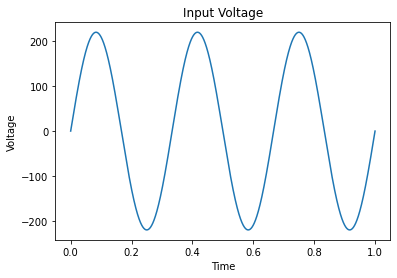

In [4]:
plt.plot(t,Vin)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Input Voltage')

In [5]:
def halfWave(x):
    Vo = np.zeros(np.size(x))
    for i in range(np.size(x)):
        if x[i]>0:
            Vo[i] = x[i]
    return Vo
    

In [6]:
Vo = halfWave(Vin)

Text(0.5, 1.0, 'Output Voltage')

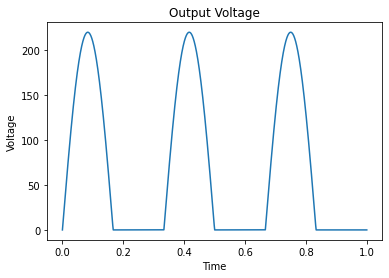

In [7]:
plt.plot(t,Vo)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Output Voltage')

In [8]:
def integrate(x,dx,n):
    S = 0
    for i in range(n-1):
        S += (x[i]+x[i+1])/2
    sum_term = S*dx
    return sum_term

In [9]:
val = integrate(Vo*Vo,dt,n)

In [10]:
print(np.sum(Vo*dt))
print(val**0.5)

70.02794153254413
109.99981666651354


In [22]:
# Resistance LOAD 
R = 10
Io = Vo/R

Text(0.5, 1.0, 'Output current with R load')

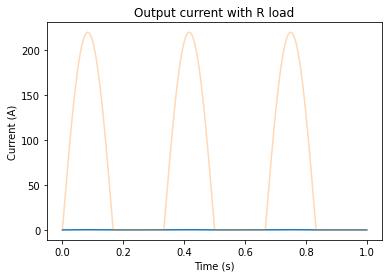

In [21]:
plt.plot(t,Io)
plt.plot(t,Vo,alpha=0.3)
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Output current with R load')

In [103]:
# R L load 
R = 1
L = 1e-3

In [97]:
def create_Io(R,L,t,Vin,dx,n):
    Io = np.zeros(np.size(Vin))
    Vo = np.zeros(np.size(Vin))
    for i in range(n-1):
        DI = ((Vin[i] - Io[i]*R)/L)*dx 
        if(Vin[i]>=0 or (Io[i]>0) or (DI>0 and Io[i]==0)):
            Io[i+1] = ((Vin[i] - Io[i]*R)/L)*dx + Io[i]
            Vo[i]=Vin[i]
    return Io,Vo

Text(0, 0.5, 'Current(A)')

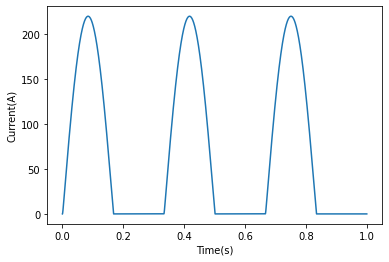

In [104]:
Io,V_o = create_Io(R,L,t,Vin,dt,n)
plt.plot(t,Io)
plt.xlabel('Time(s)')
plt.ylabel('Current(A)')

Text(0, 0.5, 'Output Voltage(V)')

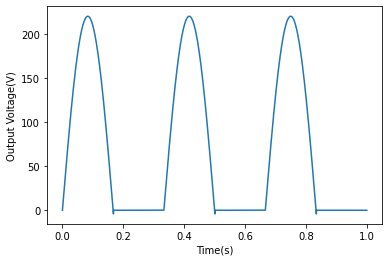

In [105]:
plt.plot(t,V_o)
plt.xlabel('Time(s)')
plt.ylabel('Output Voltage(V)')